# Milestone 1

## Bab 1 Perkenalan

### 1.1 Identitas

Nama   : Muhamad Bagus Septian

Batch  : FTDS-013

### 1.2 Dataset

Dataset yang digunakan pada penelitian ini adalah dataset Telco Customer Churn. Dataset diakses dari Kaggle dengan tautan https://www.kaggle.com/datasets/blastchar/telco-customer-churn.

### 1.3 Objective

Membuat model deep learning yang mampu memprediksi customer churn


## Bab 2 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from imblearn.under_sampling import EditedNearestNeighbours 
from imblearn.over_sampling import SMOTE 
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_auc_score
import pickle

## Bab 3 Data Loading

In [2]:
df = pd.read_csv('h8dsft_Milestone1P2_muhamad_bagus_septian.csv')

In [3]:
pd.set_option("display.max.columns", None)

### 3.1 Data Overview

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Diketahui dataset terdiri dari variabel sebagai berikut :

Variabel | Definisi
---|---
customerID | Identifikasi customer
gender | Jenis kelamin customer
SeniorCItizen | Apakah customer merupakan senior citizen(1-0)
Partner | Apakah cusomer memiliki pasangan atau tidak(Yes/No)
Dependents | Apakah customer memiliki dependents atau tidak(Yes/No)
tenure | Lama customer menjadi pelanggan dalam bulan
PhoneService | Apakah customer memiliki layanan telepon atau tidak(Yes/No)
MultipleLines | Apakah customer memiliki multiple lines atau tidak(Yes/No/No Phone Service)
InternetService | Apakah customer memiliki layanan internet atau tidak(DSL/Fiber optic/No)
OnlineSecurity | Apakah customer memiliki keamanan online security atau tidak(Yes/No/No internet service)
OnlineBackup | Apakah customer memiliki online backup atau tidak(Yes/No/No internet service)
DeviceProtection | Apakah customer memiliki device protection atau tidak(Yes/No/No internet service)
TechSupport | Apakah customer memiliki tech support atau tidak(Yes/No/No internet service)
StreamingTV | Apakah customer memiliki layanan streaming tv atau tidak(Yes/No/No internet service)
StreamingMovies | Apakah customer memiliki layanan streaming movies atau tidak(Yes/No/No internet service)
Contract | Ketentuan kontrak customer(Month-to-month/One year/Two year)
PaperlessBilling | APakah customer memiliki paperless billing(Yes/No)
PaymentMethod | Metode pembayaran customer (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic))
MonthlyCarges | Besaran tagihan setiap bulan
TotalCharges | Total besaran tagihan
Churn | Apakah customer berheti berlangganan atau tidak(Yes/No)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Diketahui dataset terdiri dari 7043 baris dan 21 kolom
- Diketahui terdapat 3 kolom numerik yaitu kolom tenure, MonthlyCharges dan TotalCharges.
- Diketahui kolom TotalCharges memiliki data dengan tipe object padahal seharusnya adalah data numerikal, maka peneliti akan mengganti tipe data tersebut.

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Tipe data pada kolom TotalCharges berhasil diganti ke float.

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Diketahui lama customer berlanganan berkisar antara 0 sampai 72 bulan dengan rata-rata berlanggan selama 32 bulan. Sementara itu besaran tagihan per bulan customer berkisar antara \$ 18.250 hingga \$ 118.750 dengan rata-rata tagihan per bulan sebesar \$ 64.761. Selain itu diketahui juga bahwa besaran total tagihan  customer berkisar antara \$ 18.800 hingga \$ 8684.800 dengan rata-rata total tagihan sebesar \$ 2283.300. Customer yang termasuk senior citizen diketahui hanya sebagian kecilnya saja dan terindikasi merupakan outlier.

## Bab 4 Exploratory Data Analysis

Peneliti ingin mengetahui proporsi customer churn.

Text(0.5, 1.0, 'Proportion of Churn')

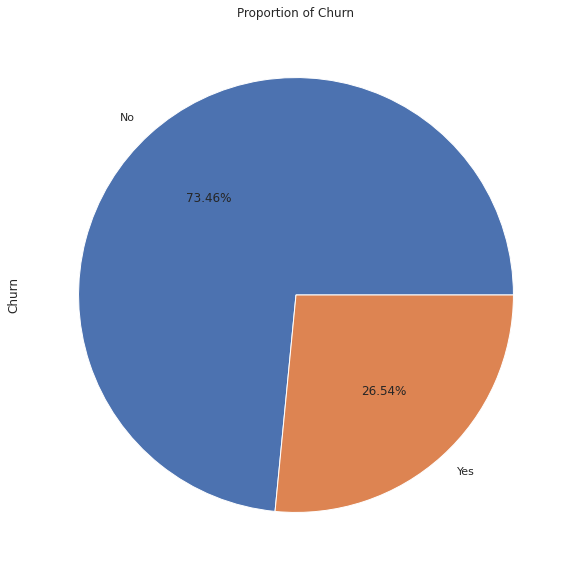

In [10]:
sns.set()
df['Churn'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Proportion of Churn')

Diketahui proporsi customer churn adalah sebesar 26.54% dan customer tidak churn sebesar 73.46%. Sehingga dapat disimpulkan terdapat imbalanced data dalam dataset.

Peneliti ingin mengetahui hubungan antara jenis kelamin customer dan churn.

Text(0.5, 0, 'gender')

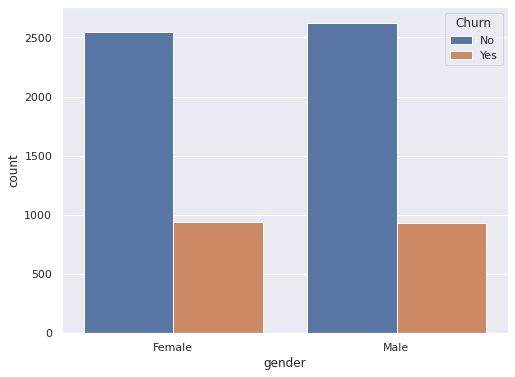

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, hue='Churn')
plt.xlabel('gender')

Diketahui terdapat lebih banyak customer laki-laki dibanding permepuan, meskipun demikian tidak terdapat perbedaan signifikan. Selain itu tidak ada hubungan antara jenis kelamin customer dan churn.

Peneliti ingin mengetahui hubungan antara kelompok usia customer dan churn.

Text(0.5, 0, 'SeniorCitizen')

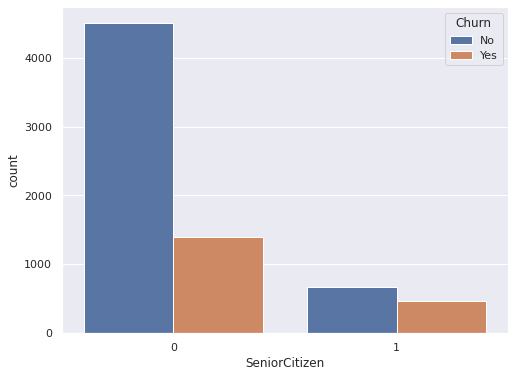

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', data=df, hue='Churn')
plt.xlabel('SeniorCitizen')

Diketahui customer yang termasuk ke dalam kelompok usia senior citizen hanyalah sebagian kecil dari keseluruhan customer. Customer churn lebih banyak terjadi pada customer di luar kelompok usia senior citizen.

Peneliti ingin mengetahui hubungan antara churn dan apakah customer memiliki partner.

Text(0.5, 0, 'Partner')

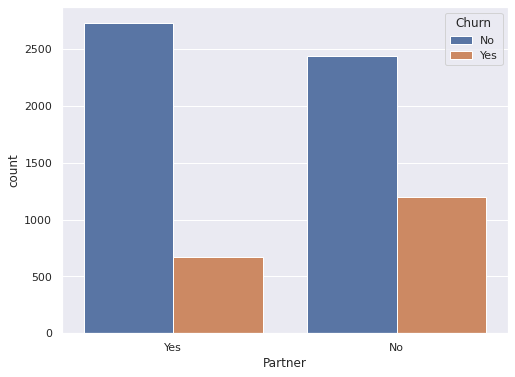

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', data=df, hue='Churn')
plt.xlabel('Partner')

Diketahui lebih banyak customer yang memiliki partner dibanding yang tidak memiliki partner. Customer yang tidak memiliki partner menunjukkan angka churn yang lebih tinggi.

Peneliti inign mengetahui apakah terdapat hubungan antara churn dan dependent customer.

Text(0.5, 0, 'Dependents')

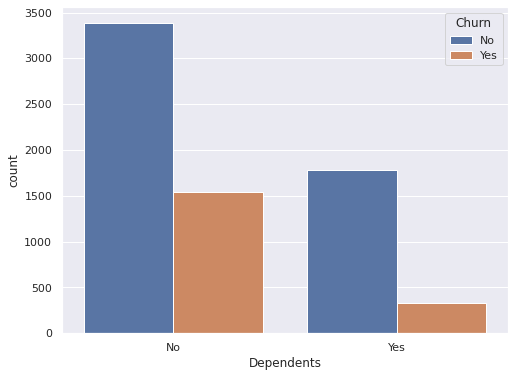

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', data=df, hue='Churn')
plt.xlabel('Dependents')

DIketahui terdapat lebih banyak customer yang tidak memiliki dependents. Churn terlihat lebih tinggi pada customer yang tidak memiliki dependents.

Peneliti ingin mengetahui hubungan antara phone service dan churn.

Text(0.5, 0, 'PhoneService')

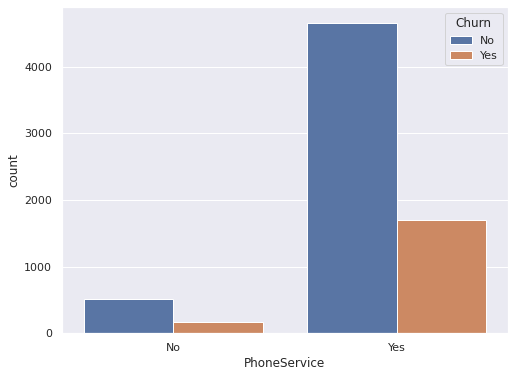

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PhoneService', data=df, hue='Churn')
plt.xlabel('PhoneService')

Diketahui proporsi customer yang memiliki phone service lebih  banyak dari customer yang tidak memiliki phone service. Churn ditemukan lebih banyak terjadi pada customer yang memiliki phone service.

Peneliti ingin mengetahui hubungan antara multiple lines dan churn.

Text(0.5, 0, 'MultipleLines')

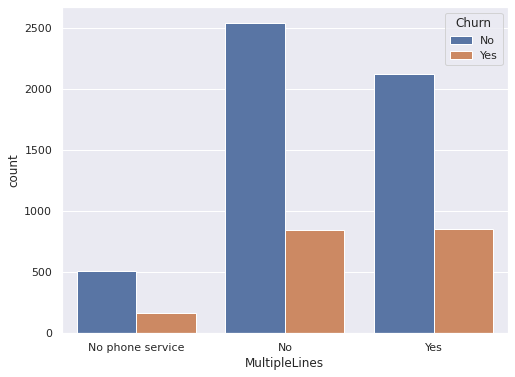

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='MultipleLines', data=df, hue='Churn')
plt.xlabel('MultipleLines')

Diketahui proporsi customer paling banyak adalah customer yang tidak memiliki multiple lines, disusul kemudian dengan customer yang memiliki multiple lines dan terakhir yang tidak memiliki phone service. Diketahui terdapat jumlah churn yang mirip antara customer yang memiliki multiple lines dan tidak, sementara itu chunr paling sedikit ditemukan pada customer yang tidak memiliki phone service.

Peneliti ingin mengetahui hubungan antara internet servie dan churn.

Text(0.5, 0, 'InternetService')

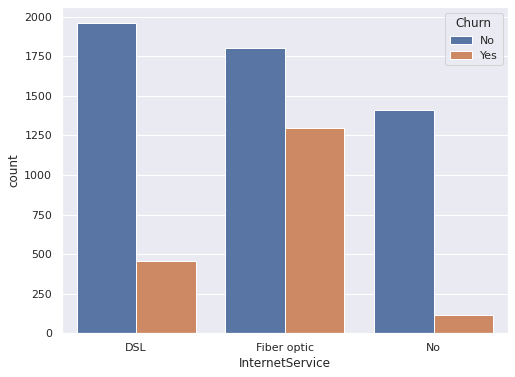

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', data=df, hue='Churn')
plt.xlabel('InternetService')

DIketahui customer dengan proporsi paling banyak adalah customer dengan internet service dsl dan yang paling sedikit adalah customer tanpa internet service. Churn paling banyak ditemukan pada customer dengan fiber optic internet service.

Peneliti ingin mengetahui hubungan online security dan churn.

Text(0.5, 0, 'OnlineSecurity')

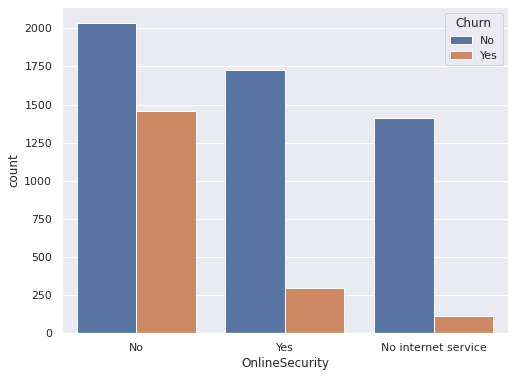

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineSecurity', data=df, hue='Churn')
plt.xlabel('OnlineSecurity')

DIketahui customer dengan proporsi terbanyak adalah customer yang tidak memiliki online security. Churn paling banyak juga ditemukan pada customer yang tidak memiliki online security.

Peneliti ingin mengetahui hubungan antara online backup dan churn.

Text(0.5, 0, 'OnlineBackup')

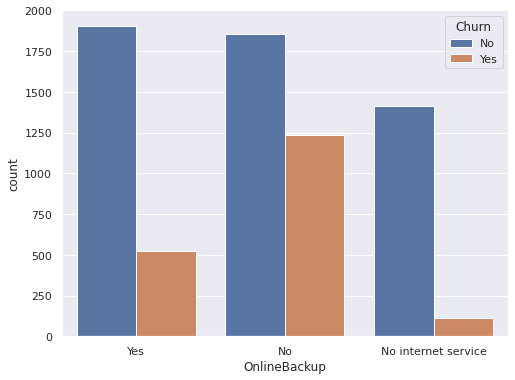

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineBackup', data=df, hue='Churn')
plt.xlabel('OnlineBackup')

Diketahui customer dengan online backup memiliki proporsi terbanyak dan customer yang tidak memiliki internet service memiliki proporsi paling sedikti. Churn ditemukan paling banyak terjadi pada customer yang tidak memiliki online backup.

Peneliti ingin mengetahui hubungan antara device protection dan churn.

Text(0.5, 0, 'DeviceProtection')

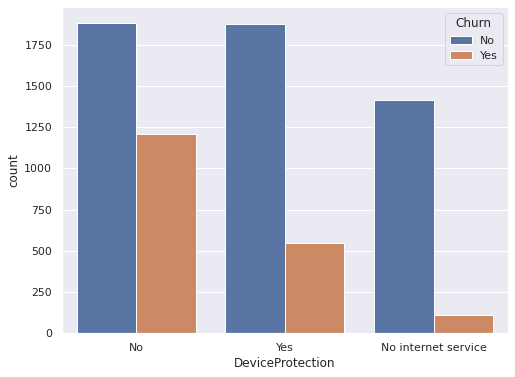

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='DeviceProtection', data=df, hue='Churn')
plt.xlabel('DeviceProtection')

Diketahui terdapat proporsi yang mirip antara customer yang memiliki device protection dan tidak. Churn ditemukan terjadi paling banyak pada customer yang tidak memiliki device protection dan paling sedikit pada customer yang tidak memiliki internet service.

Peneliti ingin mengetahui apakah terdapat hubungan antara tech support dan churn.

Text(0.5, 0, 'TechSupport')

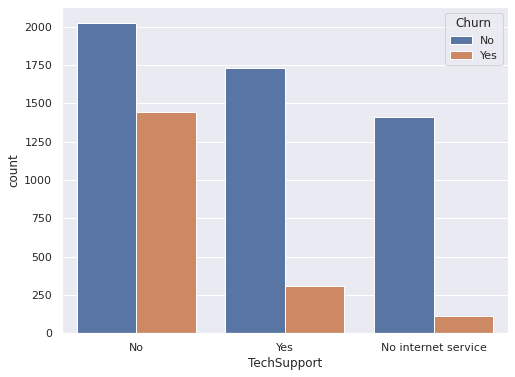

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TechSupport', data=df, hue='Churn')
plt.xlabel('TechSupport')

Diketahui proporsi customer paling banyak adalah customer tanpa tech support, proporsi paling banyak kedua adalah customer dengan tech support dan proporsi paling sedikit adalah customer tanpa internet service. Churn terjadi paling banyak pada customer tanpa internet service.

Peneliti ingin mengetahui hubungan antara streaming tv dan churn.

Text(0.5, 0, 'StreamingTV')

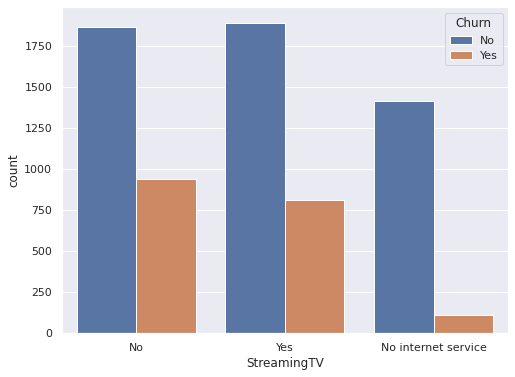

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingTV', data=df, hue='Churn')
plt.xlabel('StreamingTV')

Diketahui proporsi customer paling banyak adalah customer yang memiliki streaming tv. Proporsi chunr paling banyak ditemukan pada customer yang tidak memiliki streaming tv.

Peneliti ingin mengetahui hubungan antara streaming movies dan churn.

Text(0.5, 0, 'StreamingMovies')

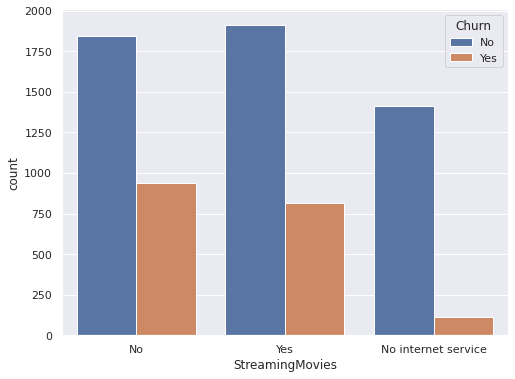

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingMovies', data=df, hue='Churn')
plt.xlabel('StreamingMovies')

Diketahui customer yang memiliki layanan streaming movies memiliki proporsi paling besar. Churn paliing banyak ditemukan pada customer yang tidak memiliki streaming movies.

Peneliti ingin mengetahui hubungan antara contact dan churn.

Text(0.5, 0, 'Contract')

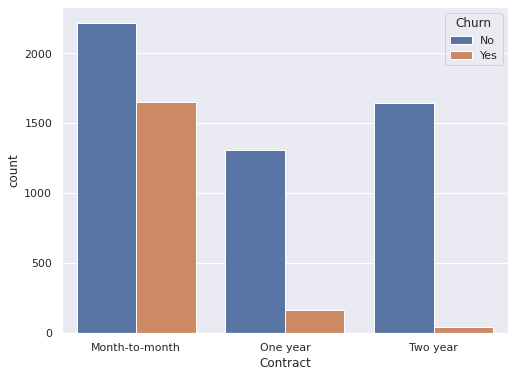

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data=df, hue='Churn')
plt.xlabel('Contract')

Diketahui proporsi contract paling banyak adalah month to month dan yang paling sedikit adlaah one year. Churn diketahui cenderung terjadi pada masa kontrak yang pendek yaitu dengan masa contract month to month dan paling sedikit  pada masa contract yang panjang yaitu two year.

Peneliti ingin mengetahui hubungan antara paperless billing dan churn.

Text(0.5, 0, 'PaperlessBilling')

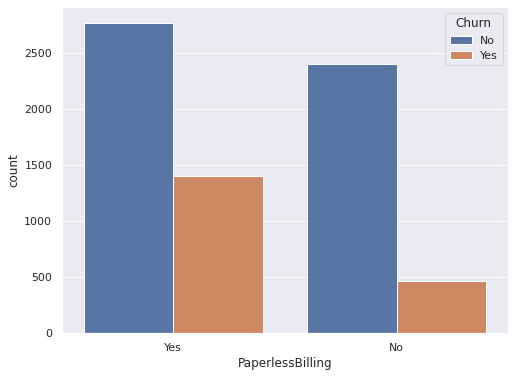

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaperlessBilling', data=df, hue='Churn')
plt.xlabel('PaperlessBilling')

Diketahui customer dengan paperless billing merupakan customer dengan proporsi mayoritas. Meskipun demikian churn paling banyak ditemukan pada customer dengan paperless billing.

Peneliti ingin mengetahui hubungan antara payment method dan churn.

Text(0.5, 0, 'PaymentMethod')

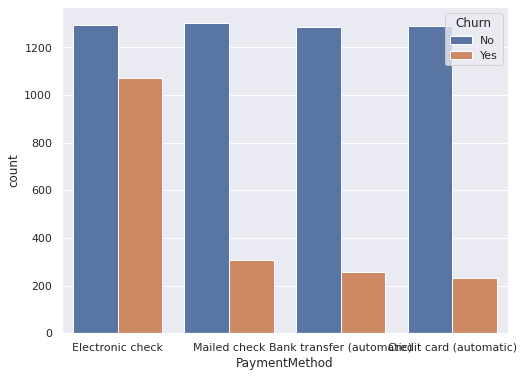

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', data=df, hue='Churn')
plt.xlabel('PaymentMethod')

Diketahui proporsi antara 4 payment method yang ada yaitu electronic check, mailed check, bank transfer dan credit card dapat terlihat tersebar hampir merata. Sementara itu churn paling banyak ditemukan pada payment method electronic check.

Peneliti ingin mengetahui hubungan antara tenure dan churn.

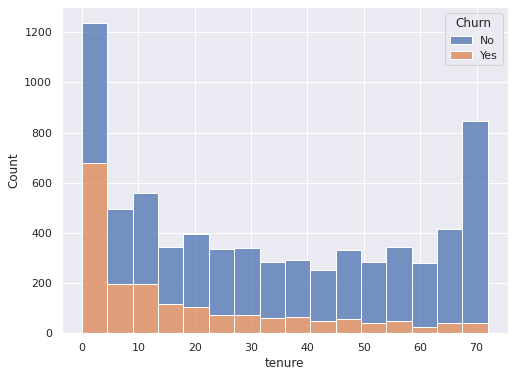

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='tenure', hue='Churn', multiple='stack')

Diketahui distribusi data costomer tenure cenderung skewed. Churn cenderung tinggi pada cutomer dengan tenure rendah.

Peneliti ingin mengetahui hubungan antara monthly charges dan churn.

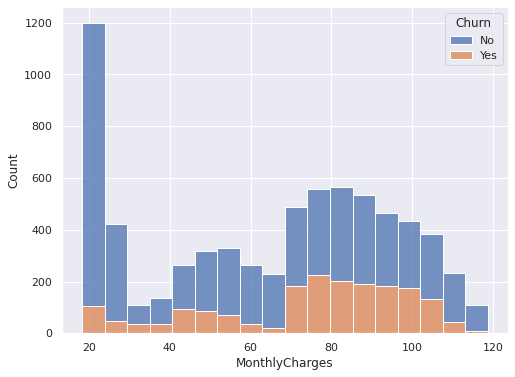

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='MonthlyCharges', hue='Churn', multiple='stack')

Diketahui distribusi monthly charges tergolong skewed. Churn terjadi paling tinggi pada montly charges dari menengah ke tinggi. 

Peneliti ingin mengetahui  hubungan antara total charges dan churn.

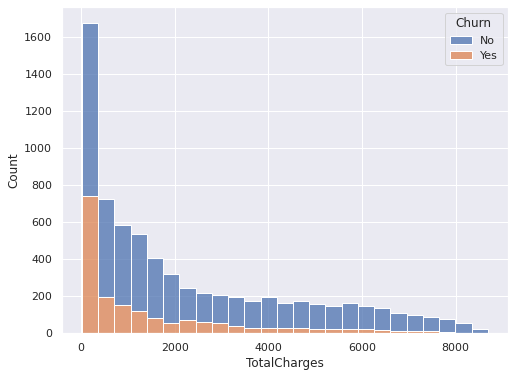

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='TotalCharges', hue='Churn', multiple='stack')

Diketahui distribusi total charges customer cenderung skewd. Churn ditemukan cenderung tinggi pada total gharges dengan jumlah rendah.

## Bab 5 Data Preprocessing

Sebelum dilakukan data preprocessing peneliti akan menduplikasi dataset untuk keperluan pengecekan nantinya.

In [30]:
data = df.copy()

Untuk selanjutnya data yang akan diolah adalah data pada dataframe `data` dan dataframe `df` adalah data mentah yang akan digunakan untuk keperluan pengecekan data jika perlu.

### 5.1 Handling Duplicate Data

Peneliti akan melakukan pengecekan terhadap duplicate data pada dataset.

In [31]:
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :")
 
duplicate

Duplicate Rows :


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Diketahui tidak ditemukan duplicate data pada dataset.

### 5.2 Handling Cardinality

Peneliti akan melakukan pengecekan cardinality pada data kategorikal.

In [32]:
print('Number of categories in the variable Customer ID             : {}'.format(len(data['customerID'].unique())))
print('Number of categories in the variable Gender                  : {}'.format(len(data['gender'].unique())))
print('Number of categories in the variable Senior Citizen          : {}'.format(len(data['SeniorCitizen'].unique())))
print('Number of categories in the variable Partner                 : {}'.format(len(data['Partner'].unique())))
print('Number of categories in the variable Dependents              : {}'.format(len(data['Dependents'].unique())))
print('Number of categories in the variable Phone Service           : {}'.format(len(data['PhoneService'].unique())))
print('Number of categories in the variable Multiple Lines          : {}'.format(len(data['MultipleLines'].unique())))
print('Number of categories in the variable Internet Service        : {}'.format(len(data['InternetService'].unique())))
print('Number of categories in the variable Online Security         : {}'.format(len(data['OnlineSecurity'].unique())))
print('Number of categories in the variable Online Backup	          : {}'.format(len(data['OnlineBackup'].unique())))
print('Number of categories in the variable Device Protection       : {}'.format(len(data['DeviceProtection'].unique())))
print('Number of categories in the variable Streaming TV            : {}'.format(len(data['StreamingTV'].unique())))
print('Number of categories in the variable Streaming Movies        : {}'.format(len(data['StreamingMovies'].unique())))
print('Number of categories in the variable Contract                : {}'.format(len(data['TechSupport'].unique())))
print('Number of categories in the variable Paperless Billing       : {}'.format(len(data['PaperlessBilling'].unique())))
print('Number of categories in the variable Payment Method          : {}'.format(len(data['PaymentMethod'].unique())))
print('Number of categories in the variable Churn                   : {}'.format(len(data['Churn'].unique())))

Number of categories in the variable Customer ID             : 7043
Number of categories in the variable Gender                  : 2
Number of categories in the variable Senior Citizen          : 2
Number of categories in the variable Partner                 : 2
Number of categories in the variable Dependents              : 2
Number of categories in the variable Phone Service           : 2
Number of categories in the variable Multiple Lines          : 3
Number of categories in the variable Internet Service        : 3
Number of categories in the variable Online Security         : 3
Number of categories in the variable Online Backup	          : 3
Number of categories in the variable Device Protection       : 3
Number of categories in the variable Streaming TV            : 3
Number of categories in the variable Streaming Movies        : 3
Number of categories in the variable Contract                : 3
Number of categories in the variable Paperless Billing       : 2
Number of categories i

Ditemukan high cardinality pada kolom customerID. Data pada kolom tersebut adalah data identifikasi customer dan memang seharusnya berbeda antara masing-masing customer sehingga wajar jika memiliki high cardinality. Peneliti memutuskan untuk membuang kolom customerID untuk menghandling cardinality pada kolom tersebut dengan pertimbangan bahwa wvariabel tersebut memang tidak akan diikutsertakan sebagai feature dalam memprediksi target.

In [33]:
data.drop(columns=['customerID'], inplace=True)

### 5.3 Get Data for Model Inference

Peneliti akan mengambil 10 data secara acak untuk keperluan model inference nantinya.

In [34]:
data_inf = data.sample(10, random_state=35)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4194,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.95,1801.90,No
5014,Male,1,Yes,No,71,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),52.30,3765.05,No
6828,Female,0,Yes,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.05,201.70,No
601,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.95,47.70,No
507,Male,0,Yes,No,2,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,167.50,Yes
1202,Male,0,Yes,No,53,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),94.25,4867.95,Yes
2208,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.80,100.80,Yes
4197,Female,0,No,Yes,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,1816.75,No
6108,Male,0,No,No,18,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.15,476.80,No
4450,Male,0,No,No,15,Yes,Yes,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),58.60,939.70,Yes


Peneliti akan memisahkan data inference dengan data set keseluruhan.

In [35]:
data_train_test = data.drop(data_inf.index)

Peneliti kan melakukan reset index pada data inference dan dataset keseluruhan.

In [36]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.95,1801.90,No
1,Male,1,Yes,No,71,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),52.30,3765.05,No
2,Female,0,Yes,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.05,201.70,No
3,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.95,47.70,No
4,Male,0,Yes,No,2,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,167.50,Yes
5,Male,0,Yes,No,53,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),94.25,4867.95,Yes
6,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.80,100.80,Yes
7,Female,0,No,Yes,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,1816.75,No
8,Male,0,No,No,18,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.15,476.80,No
9,Male,0,No,No,15,Yes,Yes,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),58.60,939.70,Yes


### 5.4 Splitting Train, Validation and Test Data

Peneliti akan memisahkan data feature dengan data target. Pada penelitian ini target yang akan diprediksi adalah Churn. Sehingga churn akan menjadi variabel target atau y dan sisanya akan menjadi variabel feature atau X.

In [37]:
X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


Setelah memisahkan antara variabel target dan variabel feature, peneliti juga akan melakukan pemisahan antara data train, validation dan test untuk keperluan evaluasi model nantinya.

In [38]:
X_train_full, X_test,  y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=35)

print("Training size  : {}".format(X_train.shape))
print("Validation size: {}".format(X_val.shape))
print("Testing size   : {}".format(X_test.shape))

Training size  : (4500, 19)
Validation size: (1126, 19)
Testing size   : (1407, 19)


### 5.5 Handling Outliers

Peneliti akan mendefinisikan fungsi diagnostik outliers menggunakan histogram dan boxplot.

In [39]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Peneliti akan melakukan pengecekan outliers.

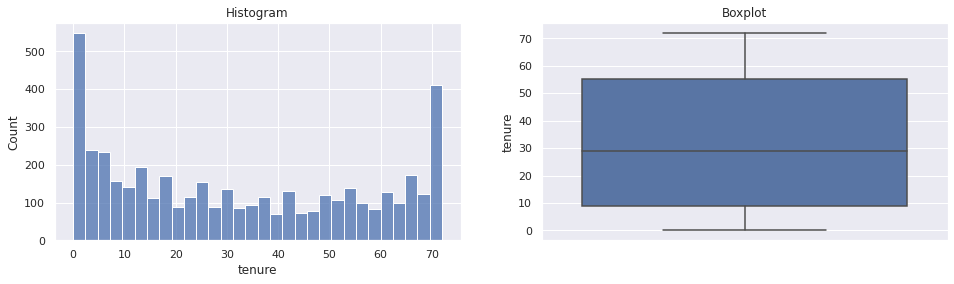

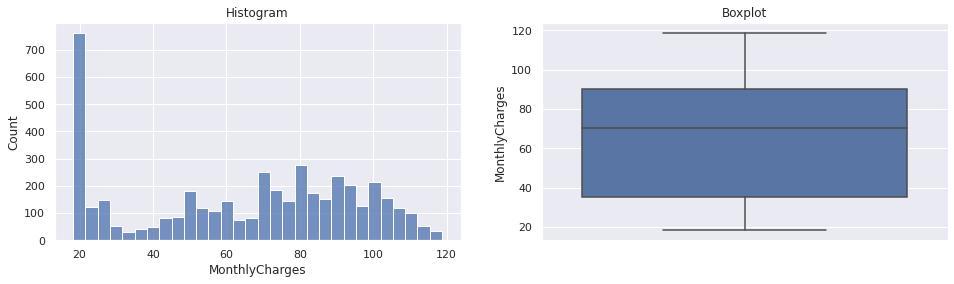

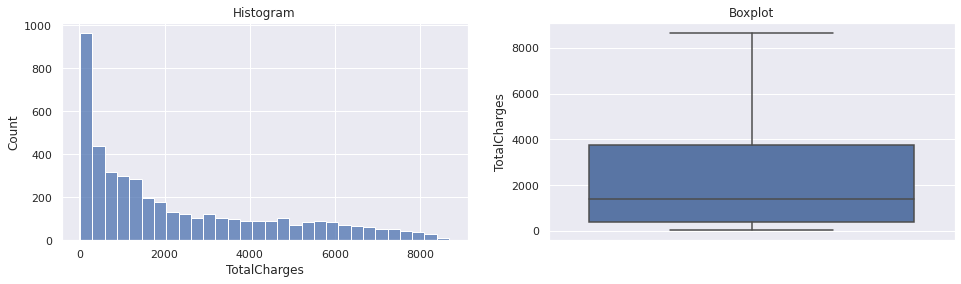

In [40]:
diagnostic_plots(X_train, 'tenure')
diagnostic_plots(X_train, 'MonthlyCharges')
diagnostic_plots(X_train, 'TotalCharges')

Dikaetahui tidak terdapat oultliers pada dataset.

### 5.6 Handling Missing Values 

Peneliti akan melakukan pengecekan terhadap missing value pada dataset.

In [41]:
X_train.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
dtype: int64

In [42]:
X_val.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [43]:
X_test.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

Diketahui terdapat missing value pada kolom TotalCharges pada data train, validation dan test. Untuk mengatasi missing value tersebut peneliti akan melakukan imputasi dengan menggunakan median karena pertimbangan distribusi data pada kolom tersebut skewed.

In [44]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X_train[num_cols])

X_train['TotalCharges'] = imputer.transform(X_train[num_cols])
X_val['TotalCharges'] = imputer.transform(X_val[num_cols])
X_test['TotalCharges'] = imputer.transform(X_test[num_cols])

In [45]:
X_train['TotalCharges']

4273    25.0
3446    70.0
3129    70.0
2456    48.0
6552     9.0
        ... 
4678    46.0
2738    66.0
5043    56.0
1371    45.0
2626    63.0
Name: TotalCharges, Length: 4500, dtype: float64

### 5.7 Feature Selection

Peneliti akan melakukan du[likasi pada data training untuk keperluan feature selection.

In [46]:
X_train_feat = X_train.copy()
y_train_feat = y_train.copy()

Sebelum melakukan analisis pemilihan feature selection, peneliti akan melakukan encoding pada data kategorikal terlebih dahulu dengan Label Encoding.

In [47]:
label = LabelEncoder() 
X_train_feat['gender'] = label.fit_transform(X_train['gender'])
X_train_feat['Partner'] = label.fit_transform(X_train['Partner'])
X_train_feat['Dependents'] = label.fit_transform(X_train['Dependents'])
X_train_feat['PhoneService'] = label.fit_transform(X_train['PhoneService'])
X_train_feat['MultipleLines'] = label.fit_transform(X_train['MultipleLines'])
X_train_feat['InternetService'] = label.fit_transform(X_train['InternetService'])
X_train_feat['OnlineSecurity'] = label.fit_transform(X_train['OnlineSecurity'])
X_train_feat['OnlineBackup'] = label.fit_transform(X_train['OnlineBackup'])
X_train_feat['DeviceProtection'] = label.fit_transform(X_train['DeviceProtection'])
X_train_feat['TechSupport'] = label.fit_transform(X_train['TechSupport'])
X_train_feat['StreamingTV'] = label.fit_transform(X_train['StreamingTV'])
X_train_feat['StreamingMovies'] = label.fit_transform(X_train['StreamingMovies'])
X_train_feat['Contract'] = label.fit_transform(X_train['Contract'])
X_train_feat['PaperlessBilling'] = label.fit_transform(X_train['PaperlessBilling'])
X_train_feat['PaymentMethod'] = label.fit_transform(X_train['PaymentMethod'])

Peneliti akan melakukan feature selection dengan menggunakan metode chi square.

In [48]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train_feat, y_train)
fit.scores_

array([5.81428464e-02, 6.56900797e+01, 5.14305898e+01, 8.35921557e+01,
       1.04901778e+04, 5.39831972e-04, 6.84304233e+00, 5.78828726e+00,
       3.72002511e+02, 1.84657172e+02, 1.19327738e+02, 3.75397300e+02,
       2.23939406e+00, 4.15447890e+00, 7.14026963e+02, 6.49155212e+01,
       3.87176057e+01, 2.13556521e+03, 1.04901778e+04])

Peneliti akan melakukan pembulatan hasil chi square untuk memudahkan interpretasinya.

In [49]:
np.round_(fit.scores_)

array([0.000e+00, 6.600e+01, 5.100e+01, 8.400e+01, 1.049e+04, 0.000e+00,
       7.000e+00, 6.000e+00, 3.720e+02, 1.850e+02, 1.190e+02, 3.750e+02,
       2.000e+00, 4.000e+00, 7.140e+02, 6.500e+01, 3.900e+01, 2.136e+03,
       1.049e+04])

In [50]:
chi = pd.Series(fit.scores_)
chi.index = X.columns
chi.sort_values(ascending=False)

TotalCharges        10490.177804
tenure              10490.177804
MonthlyCharges       2135.565206
Contract              714.026963
TechSupport           375.397300
OnlineSecurity        372.002511
OnlineBackup          184.657172
DeviceProtection      119.327738
Dependents             83.592156
SeniorCitizen          65.690080
PaperlessBilling       64.915521
Partner                51.430590
PaymentMethod          38.717606
MultipleLines           6.843042
InternetService         5.788287
StreamingMovies         4.154479
StreamingTV             2.239394
gender                  0.058143
PhoneService            0.000540
dtype: float64

Berdasarkan hasil chi square tersebut peneliti akan memilih variabel feature yang memiliki score chi square diatas 10 untuk dijadikan variabel feature. DIketahui terdapat 13 variabel yang memenuhi kriteria tersebut yaitu :

* tenure
* MonthlyCharges
* Contract
* TechSupport
* OnlineScurity
* OnlineBackup
* DeviceProtection
* Dependents
* SeniorCItizen
* TotalCharges
* PaperlessBilling
* Partner
* PaymentMethod


### 5.8 Feature Scaling and Encoding

Sebelum melakukan scaling dan encoding peneliti akan memisahkan variabel feature numerikal dan kategorikal.

In [51]:
num_feat = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_feat = ['Contract', 'OnlineSecurity', 'TechSupport', 'OnlineBackup',
            'DeviceProtection','Dependents','SeniorCitizen', 'PaperlessBilling',
            'Partner', 'PaymentMethod']

Peneliti akan membuat pipeline untuk memmudahkan proses scaling dan encoding.

In [52]:
num_pipeline = make_pipeline(MinMaxScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_feat),
    ('pipe_cat', cat_pipeline, cat_feat)
])

data_pipeline.fit(X_train)

ColumnTransformer(transformers=[('pipe_num',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('pipe_cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Contract', 'OnlineSecurity', 'TechSupport',
                                  'OnlineBackup', 'DeviceProtection',
                                  'Dependents', 'SeniorCitizen',
                                  'PaperlessBilling', 'Partner',
                                  'PaymentMethod'])])

Peneliti melakukan feature scaling dan encoding dengan pipeline yang sudah dibuat.

In [53]:
X_train_scaled = data_pipeline.transform(X_train)
X_val_final = data_pipeline.transform(X_val)
X_test_final = data_pipeline.transform(X_test)

Peneliti juga melakukan encoding pada data target dengan LabelEncoding.

In [54]:
y_train_encode = label.fit_transform(y_train)
y_val_final = label.fit_transform(y_val)
y_test_final = label.fit_transform(y_test)

### 5.9 Handling Imbalance

Pada dataset ini diketahui terdapat imbalanced data pada data target. Sehingga peneliti akan melakukan handling imbalanced data tersebut dengan menggunakan kombinasi antara metode under sampling dan over sampling. Metode under sampling yang akan digunakan adalah EditedNearestNeighbours dan metode over sampling yang akan digunakan adalah SMOTE.

Peneliti melakukan under sampling dengan EditedNearestNegihbours

In [55]:
enn_res = EditedNearestNeighbours(sampling_strategy='majority')
X_train_enn, y_train_enn = enn_res.fit_resample(X_train_scaled, y_train_encode)

Peneliti melakukan  over sampling dengan metode SMOTE

In [56]:
sm_res = SMOTE(sampling_strategy='minority', random_state=35)
X_train_final, y_train_final = sm_res.fit_resample(X_train_enn, y_train_enn)

In [57]:
counter = Counter(y_train_final)
print(counter)

Counter({0: 2019, 1: 2019})


Diketahui jumlah  data target sudah seimbang antara kedua kelasnya.

### 5.10 Tensorflow pipeline

Peneliti akan membuat pipeline tensorflow untuk memudahkan model deep learning dalam memproses data.

In [58]:
auto = tf.data.AUTOTUNE

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train_final))
train_dataset = train_dataset.shuffle(buffer_size=32, seed=35).batch(128)
train_dataset = train_dataset.cache().prefetch(buffer_size=auto)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val_final))
val_dataset = val_dataset.batch(128)
val_dataset = val_dataset.cache().prefetch(buffer_size=auto)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test_final))
test_dataset = test_dataset.batch(128)
test_dataset = test_dataset.cache().prefetch(buffer_size=auto)

## Bab 6 Model Definition

Pada penelitian inin akan dibuat model ANN dengan dua meotde yaitu Sequential API dan FUnctional API.

### 6.1 Sequential API Model

Pada model Sequential API model akan dibuat dengan struktur arsitektur sequential dimulai dari inuput kemudian melewati 7 hidden layer dengan jumlah neuron yang berbeda dan kemudian masuk ke output layer.

In [59]:
model_seq = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[30,]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(512 , kernel_initializer=keras.initializers.GlorotUniform(seed=35), activation="softmax"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(256 , kernel_initializer=keras.initializers.GlorotUniform(seed=35), activation="softmax"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(128 ,kernel_initializer=keras.initializers.GlorotUniform(seed=35), activation="softmax"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(64 ,kernel_initializer=keras.initializers.GlorotUniform(seed=35), activation="softmax"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(32, kernel_initializer=keras.initializers.GlorotUniform(seed=35), activation="softmax"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(16, kernel_initializer=keras.initializers.GlorotUniform(seed=35), activation="softmax"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(8, kernel_initializer=keras.initializers.GlorotUniform(seed=35), activation="softmax"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(1, activation="sigmoid")
  ])

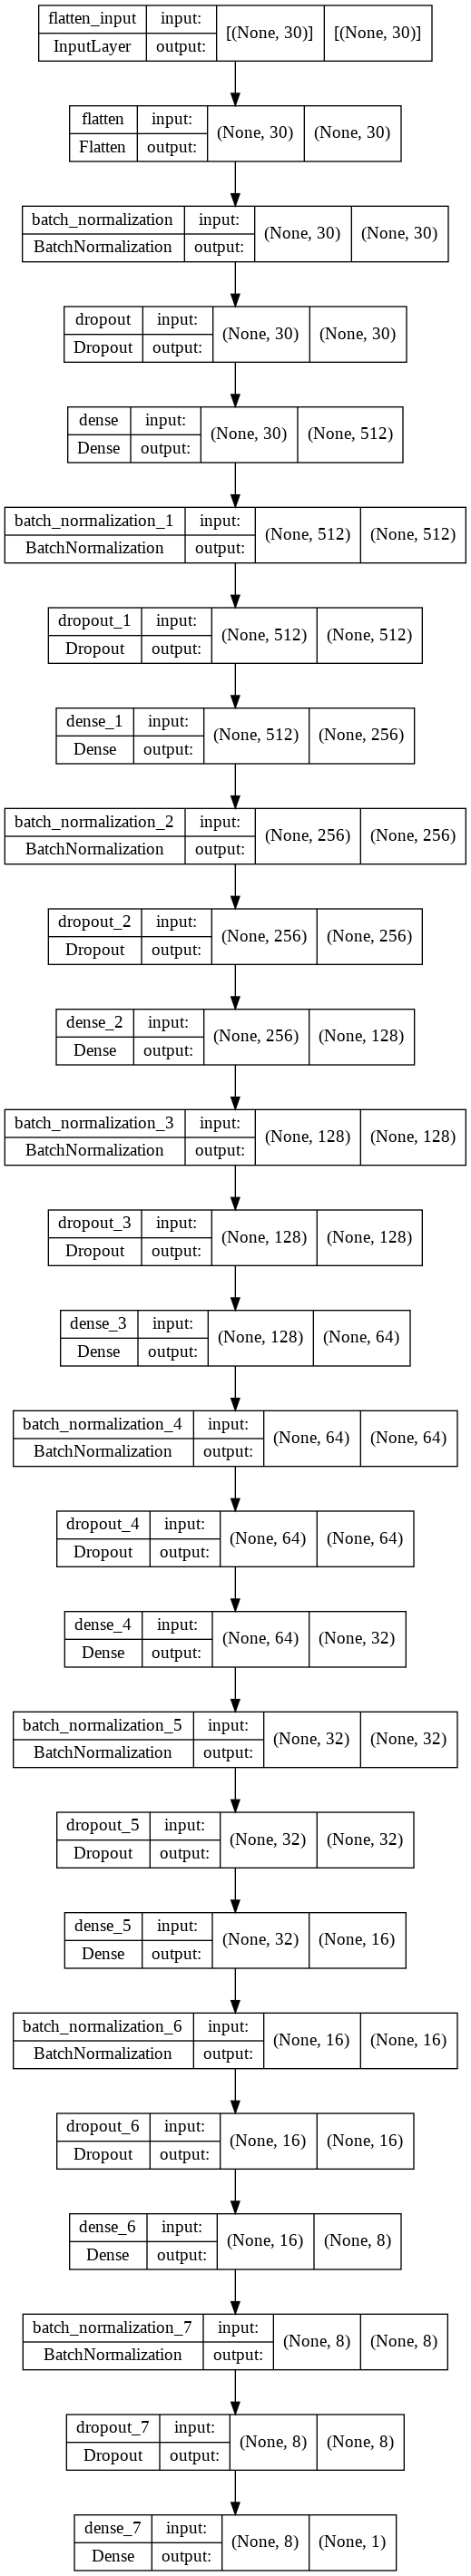

In [60]:
keras.utils.plot_model(model_seq, show_shapes=True)

### 6.2 Functional API Model

Pada model Functional API arsitektur model akan dimulai dari satu input layer kemudian setelah dilakukan flatten layer akan dibuat dua jalur yang berbeda. Pada jalur pertama terdapat 3 hidden layer dengan jumlah neruon yang akan mengecil pada setiap hidden layernya. Pada jalur kedua akan terdapat 3 hidden layer dengan jumlah neuron yang konstan pada setiap layernya. Kedua jalur tersebut akan disatukan panda concatenate layer dan di proses bersama lalu hasilnya kemudian dimasukkan ke output layer

In [61]:
inputs = keras.Input(shape=(30,))
flatten = keras.layers.Flatten()(inputs)
norm_1 = keras.layers.BatchNormalization()(flatten)
drop_1 = keras.layers.Dropout(rate=0.2)(norm_1)
hidden_1 = keras.layers.Dense(128 , kernel_initializer=keras.initializers.GlorotUniform(seed=35), activation='softmax')(drop_1)
norm_2 = keras.layers.BatchNormalization()(hidden_1)
drop_2 = keras.layers.Dropout(rate=0.2)(norm_2)
hidden_2 = keras.layers.Dense(64, kernel_initializer=keras.initializers.GlorotUniform(seed=35), activation='softmax')(drop_2)
norm_3 = keras.layers.BatchNormalization()(hidden_2)
drop_3 = keras.layers.Dropout(rate=0.2)(norm_3)
hidden_3 = keras.layers.Dense(32, kernel_initializer=keras.initializers.GlorotUniform(seed=35), activation='softmax')(drop_3)
norm_4 = keras.layers.BatchNormalization()(hidden_3)
drop_4 = keras.layers.Dropout(rate=0.2)(norm_4)
hidden_4 = keras.layers.Dense(32, kernel_initializer=keras.initializers.GlorotUniform(seed=35), activation='softmax')(drop_1)
norm_5 = keras.layers.BatchNormalization()(hidden_4)
drop_5 = keras.layers.Dropout(rate=0.2)(norm_5)
hidden_5 = keras.layers.Dense(32, kernel_initializer=keras.initializers.GlorotUniform(seed=35), activation='softmax')(drop_5)
norm_6 = keras.layers.BatchNormalization()(hidden_5)
drop_6 = keras.layers.Dropout(rate=0.2)(norm_6)
hidden_6 = keras.layers.Dense(32, kernel_initializer=keras.initializers.GlorotUniform(seed=35), activation='softmax')(drop_6)
norm_7 = keras.layers.BatchNormalization()(hidden_6)
drop_7 = keras.layers.Dropout(rate=0.2)(norm_7)
concat = keras.layers.concatenate([drop_4, drop_7])
outputs = keras.layers.Dense(1, activation='sigmoid')(concat)

model_func = keras.Model(inputs=inputs, outputs=outputs)

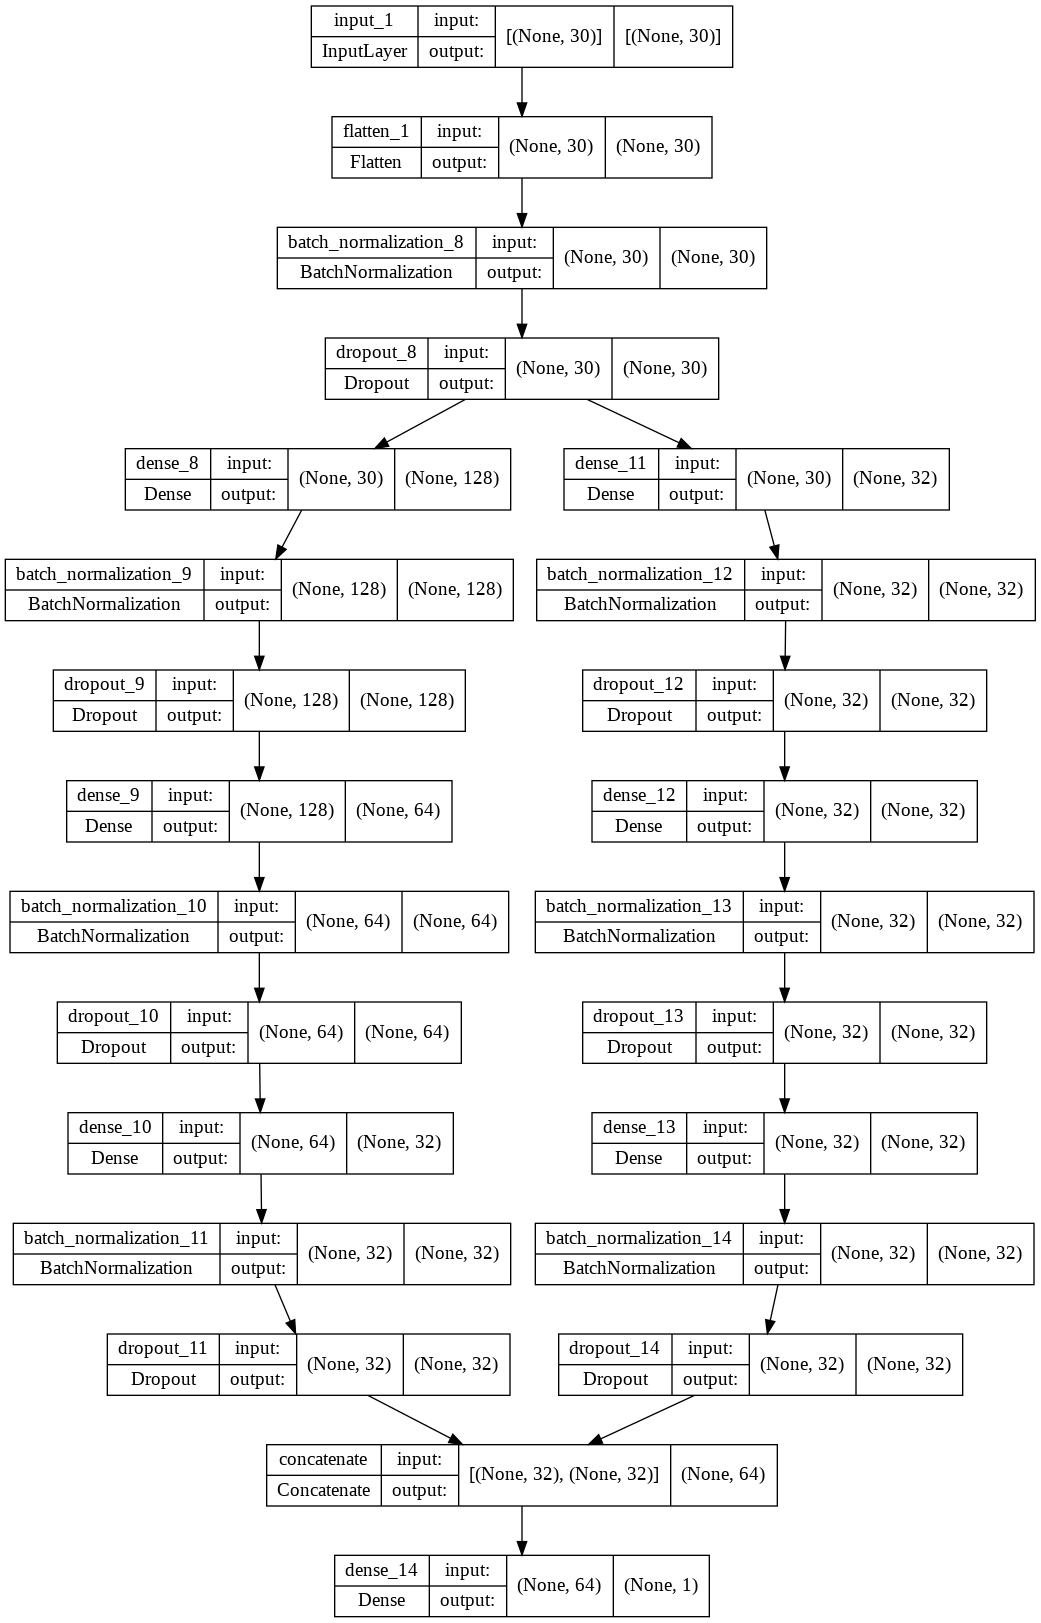

In [62]:
keras.utils.plot_model(model_func, show_shapes=True)

## Bab 7 Model Training

### 7.1 Training Sequential API

Peneliti akan melakukan training pada model Sequential API dengan loss binary crossentropy, optimizer adam, metric accuracy dan epochs 100 kali.

In [63]:
model_seq.compile(loss="binary_crossentropy",
                optimizer='adam',
                metrics=["accuracy"])

In [64]:
history_seq = model_seq.fit(train_dataset, 
                          epochs=100, 
                          validation_data=val_dataset)

Epoch 1/100
32/32 [==============================] - 8s 47ms/step - loss: 0.7035 - accuracy: 0.4737 - val_loss: 0.6703 - val_accuracy: 0.7327
Epoch 2/100
32/32 [==============================] - 1s 27ms/step - loss: 0.6974 - accuracy: 0.4742 - val_loss: 0.6737 - val_accuracy: 0.7327
Epoch 3/100
32/32 [==============================] - 1s 29ms/step - loss: 0.6969 - accuracy: 0.4876 - val_loss: 0.6765 - val_accuracy: 0.7327
Epoch 4/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6973 - accuracy: 0.4794 - val_loss: 0.6783 - val_accuracy: 0.7327
Epoch 5/100
32/32 [==============================] - 1s 25ms/step - loss: 0.6965 - accuracy: 0.4928 - val_loss: 0.6809 - val_accuracy: 0.7327
Epoch 6/100
32/32 [==============================] - 1s 26ms/step - loss: 0.6969 - accuracy: 0.4685 - val_loss: 0.6834 - val_accuracy: 0.7327
Epoch 7/100
32/32 [==============================] - 1s 25ms/step - loss: 0.6968 - accuracy: 0.4804 - val_loss: 0.6853 - val_accuracy: 0.7327
Epoch 

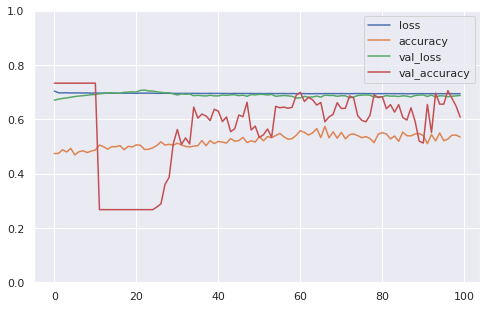

In [65]:
pd.DataFrame(history_seq.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Diketahui selama proses pelatihan model Sequential API terdapat kenaikan dan penurunan accuracy pada data validasi yang cukup tinggi. Sementara itu ditemukan juga kenaikan dan penurunan accuracy pada accuracy train tetapi dalam skala yang lebih kecil. Loss pada data validation dan train tidak terlalu menunjukkan perubahan yang signifikan.

In [66]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30)                0         
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 512)               15872     
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

Diketahui dari 195.289 parameter dalam model, terdapat 2.092 varibel yang tidak dapat dilakukkan training.

### 7.2 Training Functional API

Peneliti akan melakukan pelatihan model FUnctional API dengan loss binary crossentropy, optimizer adam, metric accuracy dan epochs 100 kali.

In [67]:
model_func.compile(loss="binary_crossentropy",
                optimizer='adam',
                metrics=["accuracy"])

In [68]:
history_func = model_func.fit(train_dataset, 
                          epochs=100, 
                          validation_data=val_dataset)

Epoch 1/100
32/32 [==============================] - 3s 15ms/step - loss: 0.7523 - accuracy: 0.4403 - val_loss: 0.6646 - val_accuracy: 0.7327
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7165 - accuracy: 0.4765 - val_loss: 0.6711 - val_accuracy: 0.7327
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7115 - accuracy: 0.4755 - val_loss: 0.6766 - val_accuracy: 0.7327
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.7075 - accuracy: 0.4881 - val_loss: 0.6811 - val_accuracy: 0.7327
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7039 - accuracy: 0.4884 - val_loss: 0.6846 - val_accuracy: 0.7327
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7037 - accuracy: 0.4881 - val_loss: 0.6875 - val_accuracy: 0.7327
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7037 - accuracy: 0.4864 - val_loss: 0.6896 - val_accuracy: 0.7327
Epoch 8/100


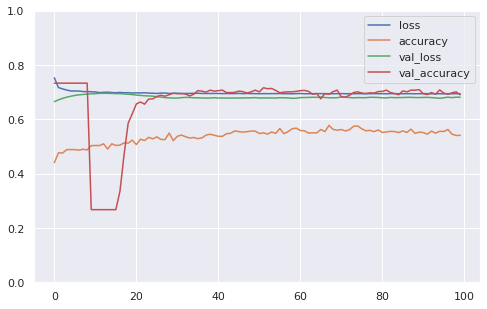

In [69]:
pd.DataFrame(history_func.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Diketahui terdapat penurunan accuracy yang cukup curam untuk data validation di beberapa epoch awal, lalu kemudian naik dan memiliki variasi perubahan yang cukup stabil hingga epoch terakhir. Cenderung terjadi kenarikan untuk accuracy data training selama pelatihan. Tidak ditemukan perubahan yang signifikan selama pelatihan pada skor loss untuk data train dan validation. 

In [70]:
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 flatten_1 (Flatten)            (None, 30)           0           ['input_1[0][0]']                
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 30)          120         ['flatten_1[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 dropout_8 (Dropout)            (None, 30)           0           ['batch_normalization_8[0][0]

Diketahui pada model Functional API terdapat 18.873 parameter dengan 700 parameter yang tidak bisa ditraining.

## Bab 8 Model Evaluation

### 8.1 Sequential API Evaluation

Peneliti akan melakukan melakukan evaluasi dengan menggunakan data train dan test.

In [71]:
result_train_seq = model_seq.evaluate(train_dataset, batch_size=128)
result_test_seq = model_seq.evaluate(test_dataset, batch_size=128)
print('Train - Loss     : ', result_train_seq[0])
print('Train - Accuracy : ', result_train_seq[1])
print('')
print('Test - Loss     : ', result_test_seq[0])
print('Test - Accuracy : ', result_test_seq[1])
print('')

11/11 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.6070
Train - Loss     :  0.6613060235977173
Train - Accuracy :  0.8088162541389465

Test - Loss     :  0.6863141059875488
Test - Accuracy :  0.606965184211731



Diketahui skor accuracy pada data train adalah 0.80 dan skor accuracy untuk data test adalah 0.60. Melihat skor tersebut dapat dilihat bahwa terdapat selisih yang jauh antara skor accuracy data train dan data test. Sehingga dapat disimpulkan bahwa model overfit.

Peneliti akan melakukan evaluasi secara menyeluruh pada model Sequential API dengan menggunakan confusion matrix dan classification report. sebelumnya peneliti akan mendefinisikan kelas prediksi terlebih dahulu

In [72]:
classes = [0, 1]

Peneliti akan melakukan prediksi pada data train dan data test

In [73]:
y_pred_train_seq = (model_seq.predict(train_dataset) > 0.5)*1 
y_pred_test_seq = (model_seq.predict(test_dataset) > 0.5)*1

Peneliti akan melakukan evaluasi pada hasil prediksi model dengan menggunakan roc-auc score.

In [74]:
print('ROC-AUC score train : ',roc_auc_score(y_train_final,y_pred_train_seq))
print('ROC-AUC score test : ',roc_auc_score(y_test_final,y_pred_test_seq))

ROC-AUC score train :  0.8063397721644378
ROC-AUC score test :  0.7035460920094864


Diketahui roc-auc score untuk prediksi data train adalah 0.80 sedangkan recall score untuk data test adalah 0.70. Melihat kedua skor roc-auc tersebut dapat dilihat bahwa skor tersebut menunjukkan angka yang cukup tinggi. Selain itu selisih diantara keduanya juga tidak begitu jauh. Sehingga dapat disimpulkan jika berdasarkan hasil roc-auc score model adalah goodfit.

Peneliti akan membuat classification matrix berdasarkan prediksi model

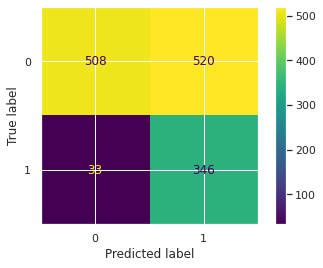

In [75]:
cm = confusion_matrix(y_test_final, y_pred_test_seq, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

disp.plot()
plt.show()

Diketahui dari hasil prediksi terdapat 508 True Positive, 520 False Positive, 33 False Negative dan 346 True Negative.

In [76]:
print(classification_report(y_test_final,y_pred_test_seq))

              precision    recall  f1-score   support

           0       0.94      0.49      0.65      1028
           1       0.40      0.91      0.56       379

    accuracy                           0.61      1407
   macro avg       0.67      0.70      0.60      1407
weighted avg       0.79      0.61      0.62      1407



Diketahui precission score model Sequential API lebih baik dalam memprediksi kelas 0 dan recall score model lebih baik dalam memprediksi kelas 1.

### 8.2 Functional API Evaluation

In [77]:
result_train_func = model_func.evaluate(train_dataset, batch_size=128)
result_test_func = model_func.evaluate(test_dataset, batch_size=128)
print('Train - Loss     : ', result_train_func[0])
print('Train - Accuracy : ', result_train_func[1])
print('')
print('Test - Loss     : ', result_test_func[0])
print('Test - Accuracy : ', result_test_func[1])
print('')

11/11 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6859
Train - Loss     :  0.6553589701652527
Train - Accuracy :  0.8605745434761047

Test - Loss     :  0.6798356771469116
Test - Accuracy :  0.6858564615249634



Diketahui skor accuracy pada data training adalah 0.86 sedangkan skor accuracy pada data test adalah 0.68. Melihat kedua skor tersebut dapat terlihat bahwa terdapat selisih yang cukup jauh antara skor accuracy data train dan data test. Sehingga dapat disimpulkan berdasarkan hal tersbut bahwa model overfit terhadap data train.

Peneliti akan melakukan prediksi pada model Functional API menggunakan data train dan data test.

In [78]:
y_pred_train_func = (model_func.predict(train_dataset) > 0.5)*1 
y_pred_test_func = (model_func.predict(test_dataset) > 0.5)*1

Peneliti akan melakukan evaluasi terhadap prediksi model dengan metric roc-auc.

In [79]:
print('ROC-AUC score train : ',roc_auc_score(y_train_final,y_pred_train_func))
print('ROC-AUC score test : ',roc_auc_score(y_test_final,y_pred_test_func))

ROC-AUC score train :  0.8571074789499753
ROC-AUC score test :  0.7342137819163681


Diketahui skor roc-auc untuk prediksi data train adalah 0.85, sedangkan skor roc-auc untuk data test adalah 0.73. Melihat kedua skor tersebut dapat terlihat bahwa tidak terdapat selisih yang cukup jauh antara skor roc-auc data train dan data test. Kedua skor tersebut juga cukup baik. Sehingga dapat disimpulkan bahwa model Functional API goodfit.

Peneliti akan membuat cofusion matrix berdasarkan prediksi model

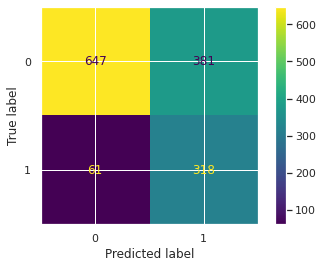

In [80]:
cm = confusion_matrix(y_test_final, y_pred_test_func, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

disp.plot()
plt.show()

Diketahui dari hasil prediksi terdapat 647 True Positive, 381 False Positive, 61 False Negative dan 318 True Negative.



In [81]:
print(classification_report(y_test_final,y_pred_test_func))

              precision    recall  f1-score   support

           0       0.91      0.63      0.75      1028
           1       0.45      0.84      0.59       379

    accuracy                           0.69      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.79      0.69      0.70      1407



Diketahui model Functional API memiliki skor precision yang lebih tinggi dalam memprediksi kelas 0 dan skor recall yang lebih tinggi dalam memprediksi kelas 1.

### 8.3 Model Improvement

Model improvement akan dilakukan pada model dengan performa yang paling baik. Berdasarkan hasil evaluasi yang telah dilakukan pada kedua model yaitu model Sequential API dan Functional API. Ditemukan bahwa performa kedua model tidak jauh berbeda, meskipun demikian model Funtional API secara garis besar memiliki performa yang lebih baik. Sehingga model yang akan dilakukan improvement adalah model Functional API.

Peneliti akan melakukan beberapa setting pada parameter model untuk melakukan model imporvements

In [135]:
model_func_imp = keras.Model(inputs=inputs, outputs=outputs)

In [136]:
adam = keras.optimizers.Adadelta(learning_rate=0.0005, epsilon=3e-08)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [137]:
model_func_imp.compile(loss="binary_crossentropy",
                optimizer=adam,
                metrics=["accuracy"])

Peneliti akan melakukan training kembali pada model yang sudah dilakukan improvements

In [138]:
history_func_imp = model_func.fit(train_dataset, 
                          epochs=100, 
                          validation_data=val_dataset,
                          callbacks=[callback])

Epoch 1/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6937 - accuracy: 0.5835 - val_loss: 0.6814 - val_accuracy: 0.6687
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6937 - accuracy: 0.5542 - val_loss: 0.6821 - val_accuracy: 0.6403
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.5552 - val_loss: 0.6820 - val_accuracy: 0.6439
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.5572 - val_loss: 0.6833 - val_accuracy: 0.6661
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5532 - val_loss: 0.6802 - val_accuracy: 0.6714
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6938 - accuracy: 0.5537 - val_loss: 0.6786 - val_accuracy: 0.6998
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.5604 - val_loss: 0.6812 - val_accuracy: 0.6963
Epoch 8/100
3

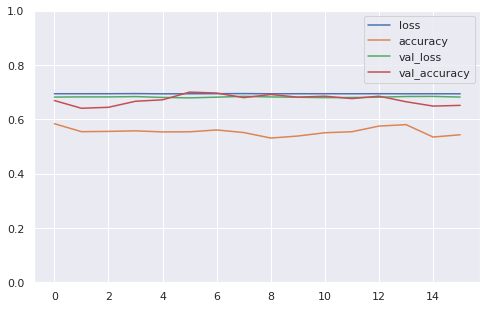

In [139]:
pd.DataFrame(history_func_imp.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Diketahui training tidak dijalankan hingga epoch selesai karena tidak ditemukan penurunan loss setelah 10 epochs

In [140]:
result_train_func_imp = model_func.evaluate(train_dataset, batch_size=128)
result_test_func_imp = model_func.evaluate(test_dataset, batch_size=128)
print('Train - Loss     : ', result_train_func_imp[0])
print('Train - Accuracy : ', result_train_func_imp[1])
print('')
print('Test - Loss     : ', result_test_func_imp[0])
print('Test - Accuracy : ', result_test_func_imp[1])
print('')

11/11 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.6944
Train - Loss     :  0.6514424085617065
Train - Accuracy :  0.862555742263794

Test - Loss     :  0.677173376083374
Test - Accuracy :  0.6943852305412292



Diketahui setelah dilakukan model improvements accuracy skor data train naik menjadi 0.86 dan accuracy data test naik menjadi 0.69

Peneliti akan melakukan prediksi dengan model yang sudah diimprove.

In [141]:
y_pred_train_func = (model_func.predict(train_dataset) > 0.5)*1 
y_pred_test_func = (model_func.predict(test_dataset) > 0.5)*1

Peneliti akan melakukan evaluasi prediksi model dengan metric roc-auc.

In [142]:
print('ROC-AUC score train : ',roc_auc_score(y_train_final,y_pred_train_func))
print('ROC-AUC score test : ',roc_auc_score(y_test_final,y_pred_test_func))

ROC-AUC score train :  0.8595839524517088
ROC-AUC score test :  0.7408832376826175


Diketahui skor roc-auc prediksi train adalah sebesar 0.85 dan skor roc-auc prediksi test adalah sebesar 0.74. Melihat kedua skor tersebut dapat terlihat bahwa kedua skor tidak memiliki selisih yang terlampau jauh dan kedua skor dapat dikatakan cukup tinggi. Sehingga peneliti menyimpulkan model yang dilakukan improvement adalah goodfit.

Peneliti akan membuat confusion matrix berdasarkan hasil prediksi model.

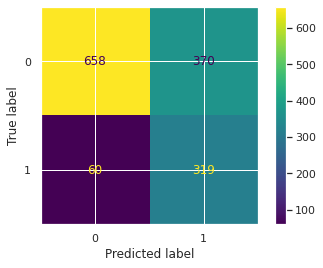

In [143]:
cm = confusion_matrix(y_test_final, y_pred_test_func, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

disp.plot()
plt.show()

Diketahui dari hasil prediksi terdapat 658 True Positive, 370 False Positive, 60 False Negative dan 319 True Negative.

In [144]:
print(classification_report(y_test_final,y_pred_test_func))

              precision    recall  f1-score   support

           0       0.92      0.64      0.75      1028
           1       0.46      0.84      0.60       379

    accuracy                           0.69      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.69      0.71      1407



Setelah dilakukan model improvements ditemukan terdapat kenaikan pada skor precision untuk kelas 0 dan juga kenaikan pada skor precision kelas 1. Skor recall pada kelas 0 juga mengalami peningkatan. Selain itu skor f1 pada prediksi kelas 1 juga mengalami peningkatan. Sehingga dapat disimpulkan model dapat memprediksi kedua kelas dengan semakin baik setelah dilakukan model improvements.

## Bab 9 Model Inference

### 9.1 Freeze Model

Peneliti akan membekukan model agar tidak bisa dilakukan training sebelum melakukan model saving.

In [145]:
model_func.trainable=False

### 9.2 Model Saving

In [146]:
model_func.save('churn_model.h5')

model_func.save('churn_model')

with open("data_pipeline.pkl", "wb") as model_file:
    pickle.dump(data_pipeline, model_file)

In [147]:
! zip -r churn_model.zip churn_model

updating: churn_model/ (stored 0%)
updating: churn_model/keras_metadata.pb (deflated 94%)
updating: churn_model/assets/ (stored 0%)
updating: churn_model/saved_model.pb (deflated 91%)
updating: churn_model/variables/ (stored 0%)
updating: churn_model/variables/variables.index (deflated 74%)
updating: churn_model/variables/variables.data-00000-of-00001 (deflated 16%)


### 9.3 Model Loading

In [148]:
churn_model = keras.models.load_model('churn_model.h5', compile=False)

with open("data_pipeline.pkl", "rb") as model_file:
    data_pipeline = pickle.load(model_file)

### 9.4 Model Inference

In [149]:
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.95,1801.90,No
1,Male,1,Yes,No,71,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),52.30,3765.05,No
2,Female,0,Yes,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.05,201.70,No
3,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.95,47.70,No
4,Male,0,Yes,No,2,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,167.50,Yes
5,Male,0,Yes,No,53,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),94.25,4867.95,Yes
6,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.80,100.80,Yes
7,Female,0,No,Yes,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,1816.75,No
8,Male,0,No,No,18,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.15,476.80,No
9,Male,0,No,No,15,Yes,Yes,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),58.60,939.70,Yes


Peneliti akan melakukan feature encoding dan scaling dengan menggunakan pipeline.

In [150]:
preprc_inf = data_pipeline.transform(data_inf)

Peneliti akan melakukan prediksi pada data inference yang sudah dilakukan encoding dan scaling.

In [164]:
y_pred_inf = (model_func.predict(preprc_inf) > 0.5)*1 

Peneliti akan menggabungkan hasil prediksi model dengan dataset.

In [168]:
y_pred_inf_df = pd.DataFrame(np.round(y_pred_inf, decimals=2), columns=['churn_pred'])

In [167]:
data_inf_pred = pd.concat([data_inf, y_pred_inf_df], axis=1)
data_inf_pred

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_pred
0,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.95,1801.90,No,1
1,Male,1,Yes,No,71,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),52.30,3765.05,No,1
2,Female,0,Yes,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.05,201.70,No,0
3,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.95,47.70,No,0
4,Male,0,Yes,No,2,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,167.50,Yes,0
5,Male,0,Yes,No,53,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),94.25,4867.95,Yes,1
6,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.80,100.80,Yes,1
7,Female,0,No,Yes,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,1816.75,No,1
8,Male,0,No,No,18,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.15,476.80,No,0
9,Male,0,No,No,15,Yes,Yes,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),58.60,939.70,Yes,1


Diketahui terdapat kesalahan prediksi pada data inference untuk kelas 1 sebanyak 1 kali dan kelas 0 sebanyak 3 kali. 

## Bab 10 Kesimpulan

### 10.1 Insight EDA

Berdasarkan EDA diketahui bahwa proporsi customer yang churn lebih sedikit daripada customer yang tidak churn. Customer yang cenderung menunjukkan churn yang tinggi adalah customer dengan karakteristik yaitu:
- bukan merupakan senior citizen
- tidak memiliki partner
- tidak memiliki dependents
- memiliki phone service
- memiliki internet service dengan fiber 
- tidak memiliki online security
- tidak memiliki online backup
- tidak memiliki device protection
- tidak memiliki tech support
- tidak memiliki streaming tv
- tidak memiliki streaming movies
- memiliki kontrak month to month
- memiliki paperless billing
- menggunakan metode pembayaran electronic check
- memiliki tenure yang singkat
- memiliki monthly charges yang sedang hingga ke tinggi
- total charges rendah

Melihat karekteristik tersebut jika ditelaah beberapa karakteristik terntentu seperti bukan senior citizen, tidak memiliki dependents maupun partner, menggunakan metode pembayaran paperless billing dan electronic check peneliti berasumsi bahwa customer churn terjadi pada pelanggan dengan usia yang cenderung muda. Untuk bisa mengatasi churn pada customer yang berusia muda ini peneliti menyarankan perusahaan telco untuk membuat paket yang lebih affordable untuk penghasilan customer yang masih muda tersebut. Selain itu untuk menarik customer dengan usia muda berlangganan dengan Telco peneliti  mengusulkan agar telco bekerja sama dengan perusahaan streaming tv atau movies dan membuat suatu paket diskon berlangganan layanan streaming pada telco dengan paket diskon.


### 10.2 Kesimpulan Analisis Model

Pada penelitian ini dibuat dua model deep learning ANN untuk memprediksi churn. Kedua model dibuat dengan arsitektur yang berbeda yaitu Sequential API dan Functional API. Kedua model tersebut kemudian akan dievaluasi untuk mencari model dengan performa terbaik.

Pada proses pelatihan kedua model tersebut ditemukan bahwa selisih antara skor accuracy dan loss tidak begitu jauh dan pada mayoritas epoch skor loss ditemukan lebih tinggi dari skor accuracynya.

Model Sequential API dievaluasi dengan atribut evaluate dari tensorflow dan juga dievaluasi menggunakan metric roc-auc pada prediksi model. Pada evaluasi dengan atribut evaluate dari tensorflow ditemukan skor accuracy data test sebesar 0.80 dan skor accuracy data test sebesar 0.60. Berdasarkan kedua skor accuracy tersebut dapat terlihat bahwa terdapat selisih yang cukup jauh. Sehingga dapat disimpulkan berdasarkan analisi hasil atribut evaluate model overfit terhadap data train.

Sementara itu evaluasi juga dilakukan dengan hasil prediksi model dengan menggunakan metric roc-auc. Metric roc-auc mengukur seberapa baik meodel mengklasifikasikan dua kelas data. Berdasarkan hasil evaluasi dengan metric roc-auc ditemukan skor roc-auc untuk prediksi data train sebesar 0.80 dan prediksi data test sebesar 0.70. Melihat kedua skor tersebut tidak ditemukan selisih yang cukup jauh. Sehingga berdasarkan evaluasi dengan metric roc-auc model dapat dikatakan goodfit.

Evaluasi model juga dilakukan pada model Functional API dengan metode yang sama yaitu dengan atribut evaluate dari tensorflow dan juga metric roc-auc. Berdsarakan evaluasi dari atribut evaluate ditemukan skor accuracy data train sebesar 0.86 dan data test sebesar 0.68. Terlihat dari kedua skor tersebut bahwa terdapat selisih yang cukup jauh antara skor accuracy data train dan data test. Sehinga dapat disimpulkan bahwa model overfit terhadap data train.

Evaluasi kedua untuk model Functional API dilakukan dengan metric roc-auc. Berdasarkan evaluasi dengan metric tersebut diketahui bahwa skor roc-auc untuk prediksi data train adalah sebesar 0.85 dan data test sebesar 0.73. Merujuk pada kedua skor tersebut tidak ditemukan selisih yang jauh antara keduanya dan juga kedua skor tersebut cukup tinggi. Sehingga dapat disimpulkan bahwa model goodfit.

Dalam pemilihan model terdapat dua hasil evaluasi yang kontradiktif antara evaluasi menggunakan atribut evaluate dan metric roc-auc pada kedua model. Menghadapi masalah tersebut peneliti memutuskan untuk menggunakan hasil evaluasi metric roc-auc karena evaluasi dengan metric tersebut melihat prediksi model. Berdasarkan evaluasi dengan metric roc-auc model yang memiliki skor lebih baik adalah model Functional API.

Pada model Functional API dilakukan model improvements dengan melakukan hyperparameter tuning optimizernya yaitu dengan menggunakan optimizer Adadelta. Peneliti juga menggunakan early stopping untuk mengehentikan training model pada weight terbaik. Setelah dilakukan model imporvements diketahui skor roc-auc model untuk data train naik menjadi 0.85 dan data test 0.74. Sehingga dapat disimpulkan hyperparameter tuning yang dilakukan meningkatakn performa model.

Meskipun demikian pada saat melakukan model inferential ditemukan 4 kali error dalam prediksi model yaitu 1 kali error dalam memprediksi kelas 1 dan 3 kali error dalam memprediksi kelas 0. Sehingga performa model masih dapat diperbaiki dalam melakukan prediksi pada target.

Peneliti menyarankan dalam pembuatan model ANN selanjutnya untuk melakukan eksplorasi pada hyperparameter tuning lain untuk meningkatkan performa model.Selain itu peneliti juga menyarankan untuk melakukan transfer learning pada model yang sudah terpercaya performanya dalam memprediksi data tabular untuk meningkatkan performa model.

